In [1]:
from IPython.display import Image, display

In [2]:
import numpy as np
from path import Path
import struct
import os
import cv2

In [3]:
test_dataset_names = ["chess-seq-01", "chess-seq-02", "fire-seq-01", "fire-seq-02", \
                      "office-seq-01", "office-seq-03", "redkitchen-seq-01", "redkitchen-seq-07"]
labels = ["input", "ground truth", "cpp", "cpp with ptq", "fadec"]

In [4]:
org_dir = Path("../dev/dataset_converter/7scenes/images_7scenes")
gt_dir = Path("../dev/dataset_converter/7scenes/data_7scenes")

In [5]:
def load_binary_image(file_path):
    data = []
    with open(file_path, 'rb') as f:
        while True:
            d = f.read(1)
            if len(d) != 1:
                break
            data.append(struct.unpack('b', d))
    image = np.array(data).reshape(3, 256, 320)[::-1].astype('uint8').transpose(1,2,0)
    return cv2.resize(image, (96, 64), interpolation=cv2.INTER_NEAREST)


In [6]:
def load_binary_depth(file_path):
    data = []
    with open(file_path, 'rb') as f:
        while True:
            d = f.read(4)
            if len(d) != 4:
                break
            data.append(struct.unpack('f', d))
    depth = np.array(data).reshape(64, 96)
    return np.round(np.clip(depth * 72, 0, 255)).astype(np.uint8)
    

In [7]:
def get_images(test_dataset_name, file_number):
    files = sorted((Path('cpp/results_7scenes') / test_dataset_name).files("*.bin"))
    for file_idx in range(len(files)):
        if files[file_idx][-10:-4] == file_number:
            break
    gts = np.load(gt_dir / test_dataset_name + ".npz")['ground_truth'][1:]
    fadecs = np.load(Path('fadec/depths') / test_dataset_name + ".npz")['depths'][:,0,0,:,:]

    images = []
    images.append(load_binary_image(org_dir / test_dataset_name / file_number))
    images.append(np.round(np.clip(gts[file_idx] * 72, 0, 255)).astype(np.uint8))
    images.append(load_binary_depth(Path("cpp/results_7scenes") / test_dataset_name / file_number + ".bin"))
    images.append(load_binary_depth(Path("cpp_with_ptq/results_7scenes") / test_dataset_name / file_number + ".bin"))
    images.append(np.round(np.clip(fadecs[file_idx] * 72, 0, 255)).astype(np.uint8))

    return images

In [8]:
def visualize_images(images, test_dataset_name, file_number):
    os.makedirs("tmp", exist_ok=True)
    file_names = ["tmp/%s-%s-%s.png" % (test_dataset_name, file_number, i) for i in range(len(images))]
    for i in range(len(images)):
        cv2.imwrite(file_names[i], images[i])

    for i in range(len(images)):
        print(labels[i])
        display(Image(file_names[i]))

input


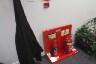

ground truth


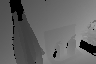

cpp


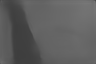

cpp with ptq


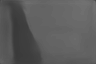

fadec


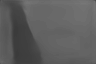

In [9]:
test_dataset_name = test_dataset_names[2]
file_number = '000139'
images = get_images(test_dataset_name, file_number)
visualize_images(images, test_dataset_name, file_number)

input


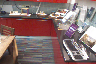

ground truth


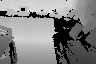

cpp


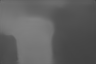

cpp with ptq


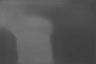

fadec


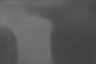

In [10]:
test_dataset_name = test_dataset_names[7]
file_number = '000268'
images = get_images(test_dataset_name, file_number)
visualize_images(images, test_dataset_name, file_number)